<a href="https://colab.research.google.com/github/jerondeepak/Project-ML/blob/main/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.6270 - accuracy: 0.8127 - val_loss: 0.3557 - val_accuracy: 0.8819
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 0.2453 - accuracy: 0.9243 - val_loss: 0.1791 - val_accuracy: 0.9453
Epoch 3/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1600 - accuracy: 0.9508 - val_loss: 0.1579 - val_accuracy: 0.9512
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1162 - accuracy: 0.9628 - val_loss: 0.1575 - val_accuracy: 0.9550
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0839 - accuracy: 0.9739 - val_loss: 0.1234 - val_accuracy: 0.9635
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0614 - accuracy: 0.9801 - val_loss: 0.1405 - val_accuracy: 0.9564
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.2464 - val_accuracy: 0.9285

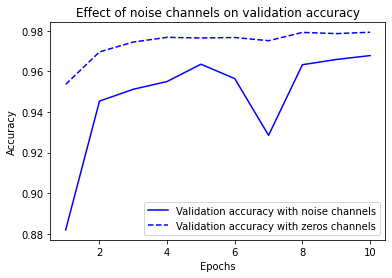

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3166 - accuracy: 0.1028 - val_loss: 2.3077 - val_accuracy: 0.1037
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2997 - accuracy: 0.1161 - val_loss: 2.3138 - val_accuracy: 0.1079
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2899 - accuracy: 0.1271 - val_loss: 2.3187 - val_accuracy: 0.1026
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2760 - accuracy: 0.1402 - val_loss: 2.3297 - val_accuracy: 0.1003
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2578 - accuracy: 0.1532 - val_loss: 2.3404 - val_accuracy: 0.1025
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2363 - accuracy: 0.1689 - val_loss: 2.3519 - val_accuracy: 0.1053
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2100 - accuracy: 0.1850 - val_loss: 2.3756 - val_accuracy: 0.1032

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 774.7418 - accuracy: 0.3574 - val_loss: 2.6489 - val_accuracy: 0.2217
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 3.1983 - accuracy: 0.2515 - val_loss: 2.0868 - val_accuracy: 0.2123
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 3.2268 - accuracy: 0.2459 - val_loss: 2.0292 - val_accuracy: 0.2432
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 2.7984 - accuracy: 0.2417 - val_loss: 3.4696 - val_accuracy: 0.2616
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5119 - accuracy: 0.2389 - val_loss: 2.1168 - val_accuracy: 0.2129
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.2789 - accuracy: 0.2373 - val_loss: 2.0314 - val_accuracy: 0.2598
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 2.4470 - accuracy: 0.2512 - val_loss: 2.0386 - val_accuracy: 0.22

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3860 - accuracy: 0.9118 - val_loss: 0.1513 - val_accuracy: 0.9561
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1433 - accuracy: 0.9636 - val_loss: 0.1535 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1142 - accuracy: 0.9726 - val_loss: 0.1713 - val_accuracy: 0.9666
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0998 - accuracy: 0.9779 - val_loss: 0.2041 - val_accuracy: 0.9662
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0893 - accuracy: 0.9819 - val_loss: 0.2305 - val_accuracy: 0.9640
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0736 - accuracy: 0.9850 - val_loss: 0.2634 - val_accuracy: 0.9686
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0737 - accuracy: 0.9865 - val_loss: 0.2709 - val_accuracy: 0.9693

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6729 - accuracy: 0.8335 - val_loss: 0.3601 - val_accuracy: 0.9053
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.9026 - val_loss: 0.3057 - val_accuracy: 0.9158
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3155 - accuracy: 0.9123 - val_loss: 0.2885 - val_accuracy: 0.9199
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2991 - accuracy: 0.9173 - val_loss: 0.2825 - val_accuracy: 0.9208
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.9191 - val_loss: 0.2754 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.9201 - val_loss: 0.2727 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.9222 - val_loss: 0.2694 - val_accuracy: 0.9266
Epoch 

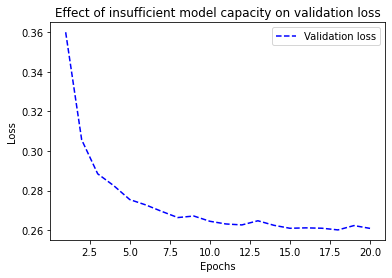

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3633 - accuracy: 0.8993 - val_loss: 0.1927 - val_accuracy: 0.9451
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1575 - accuracy: 0.9522 - val_loss: 0.1461 - val_accuracy: 0.9563
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1105 - accuracy: 0.9669 - val_loss: 0.1174 - val_accuracy: 0.9634
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0846 - accuracy: 0.9739 - val_loss: 0.1048 - val_accuracy: 0.9672
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0988 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.1042 - val_accuracy: 0.9709
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 0.0916 - val_accuracy: 0.9738
Epoch 

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5222 - accuracy: 0.7803 - val_loss: 0.4032 - val_accuracy: 0.8453
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3125 - accuracy: 0.9041 - val_loss: 0.3068 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2282 - accuracy: 0.9277 - val_loss: 0.2758 - val_accuracy: 0.8955
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1799 - accuracy: 0.9443 - val_loss: 0.2733 - val_accuracy: 0.8920
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1481 - accuracy: 0.9527 - val_loss: 0.2909 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1242 - accuracy: 0.9622 - val_loss: 0.2928 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1022 - accurac

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6110 - accuracy: 0.6627 - val_loss: 0.5509 - val_accuracy: 0.8167
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4902 - accuracy: 0.8402 - val_loss: 0.4791 - val_accuracy: 0.8278
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3916 - accuracy: 0.9041 - val_loss: 0.3858 - val_accuracy: 0.8819
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2913 - accuracy: 0.9285 - val_loss: 0.3192 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2276 - accuracy: 0.9389 - val_loss: 0.2942 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1874 - accuracy: 0.9499 - val_loss: 0.2828 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1585 - accuracy: 0.9574 - val_loss: 0.2780 - val_accuracy: 0.8890
Epoch 8/20
30

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 268ms/step - loss: 0.5398 - accuracy: 0.7603 - val_loss: 0.4265 - val_accuracy: 0.8262
Epoch 2/20
30/30 [==============================] - 8s 256ms/step - loss: 0.2630 - accuracy: 0.8933 - val_loss: 0.2699 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 8s 257ms/step - loss: 0.1451 - accuracy: 0.9439 - val_loss: 0.3094 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 9s 292ms/step - loss: 0.0960 - accuracy: 0.9701 - val_loss: 0.3720 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 8s 262ms/step - loss: 0.0436 - accuracy: 0.9925 - val_loss: 1.4768 - val_accuracy: 0.7406
Epoch 6/20
30/30 [==============================] - 8s 263ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.5103 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 8s 262ms/step - loss: 7.0117e-04 - accuracy: 0.9999 - val_loss: 0.6253 - val_accuracy: 0.8868
Ep

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5931 - accuracy: 0.7769 - val_loss: 0.4598 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3963 - accuracy: 0.8954 - val_loss: 0.3909 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3316 - accuracy: 0.9167 - val_loss: 0.3656 - val_accuracy: 0.8925
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3016 - accuracy: 0.9273 - val_loss: 0.3616 - val_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2804 - accuracy: 0.9335 - val_loss: 0.3835 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2677 - accuracy: 0.9393 - val_loss: 0.3703 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2636 - accuracy: 0.9387 - val_loss: 0.4178 - val_accuracy: 0.8656
Epoch 8/20
30

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.6420 - accuracy: 0.6227 - val_loss: 0.5373 - val_accuracy: 0.8312
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5299 - accuracy: 0.7400 - val_loss: 0.4375 - val_accuracy: 0.8627
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4463 - accuracy: 0.8066 - val_loss: 0.3503 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3784 - accuracy: 0.8449 - val_loss: 0.3006 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3268 - accuracy: 0.8719 - val_loss: 0.2847 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2838 - accuracy: 0.8975 - val_loss: 0.2790 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2514 - accuracy: 0.9129 - val_loss: 0.2763 - val_accuracy: 0.8903
Epoch 8/20
30